## Exercise 3: Intro to A/B Testing

### 1.
**Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360**

**Read the Study Overview and explain what the goal of the trial is**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

&nbsp;&nbsp;&nbsp;&nbsp;The goal of the trial is to test how to best treat patients with stable ischemic heart disease (SIHD) who also had advanced chronic kidney disense (CKD). The specific aims of the included:

1. **Primary Aim:** see whether the invasive strategy reduces the conbined risk of death or non-fatal myocardial infarction (MI) over ~2.8 years.
2. **Secondary Aims:** include broader cariovascular outcomes (cardias arrest angina, heart failure, stroke), and quality of life (QQL) measured using the Seattle Angina Questionnaire (SAQ)

### 2.
**Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions.**


**Participants:** 777

**Design:** Randomized controlled trial

**Two Strategies:**
- Invasive Strategy (INV): cardiac catheterization + revascularization (PCI or CABG) if suitable, plus optimal medical therapy (OMT)
- Conservative strategy (CON): OMT alone, with catheterization/revascularization only is OMT failed

**Randomization:** Participants were randomly assigned to INV or CON. 

**Outcomce Measures:**
- Incidence of death from any cause or myocardial infarction
- Cumulative event rate of death from any cause or myocaridal infarction (Estimated cumulative probability of experiencing death from any cuase or MI within indicated timeframe in each treatment group)

**Follow-Up Time Frame:**

2.2 years - 3 Years

**Reason Why?:**

&nbsp;&nbsp;&nbsp;&nbsp;Because patients with CKD are often excluded from heart disease trials due to risks such as contrast-induced kidney injury, the trial directly addressed the clinical uncertainty "equipoise" about whether invasive procedures actually help these high-risk groups

### 3.
**Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table** 

&nbsp;&nbsp;&nbsp;&nbsp;There are two categorical variables in the table: Treatment strategy (INV vs CON) and Outcome (Death/MI vs No Death/MI). Each cell of the table shows the participant count. This make it a 2x2 contingency table. 

*These are the data for this exercise.*

### 4.
**What is the difference in survival rates between the invasive strategy and the conservative strategy?**

In [19]:
np.random.seed(42)

inv_total = 388
inv_death = 123
inv_survivors = inv_total - inv_death

con_total = 389
con_death = 129
con_survivors = con_total - con_death

inv_survival_rate = inv_survivors/inv_total
con_survival_rate = con_survivors/con_total

rate_difference = inv_survival_rate - con_survival_rate

print(f'Original Survival Rates:')
print(f'INV: {inv_survival_rate*100:.1f}%')
print(f'CON: {con_survival_rate*100:.1f}%')
print(f'Difference: {rate_difference*100:.1f}%')

Original Survival Rates:
INV: 68.3%
CON: 66.8%
Difference: 1.5%


### 5.
**Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another**

In [6]:
np.random.seed(42)

inv_total = 388
inv_death = 123
inv_survivors = inv_total - inv_death

con_total = 389
con_death = 129
con_survivors = con_total - con_death

inv_survival_rate = inv_survivors/inv_total
con_survival_rate = con_survivors/con_total

rate_difference = inv_survival_rate - con_survival_rate

print(f'Original Survival Rates:')
print(f'INV: {inv_survival_rate*100:.1f}%')
print(f'CON: {con_survival_rate*100:.1f}%')
print(f'Difference: {rate_difference*100:.1f}%')

Original Survival Rates:
INV: 68.3%
CON: 66.8%
Difference: 1.5%


In [ ]:
def bootstrap_survival(n_total, n_death, n_samples=1000):
    death_rate = n_death / n_total
    bootstrap_deaths = np.random.binomial(n_total, death_rate, n_samples)
    bootstrap_survival_rates = (n_total - bootstrap_deaths) / n_total
    return bootstrap_survival_rates

n_samples = 10000
inv_bootstrap = bootstrap_survival(inv_total, inv_death, n_samples)
con_bootstrap = bootstrap_survival(con_total, con_death, n_samples)

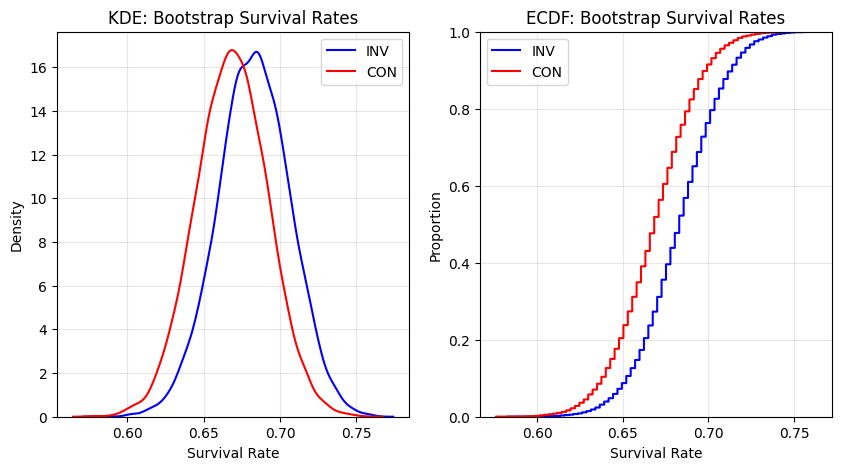

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(inv_bootstrap, color='blue', label='INV', ax=axes[0])
sns.kdeplot(con_bootstrap, color = 'red', label='CON', ax=axes[0])
axes[0].set_xlabel('Survival Rate')
axes[0].set_title('KDE: Bootstrap Survival Rates')
axes[0].legend()
axes[0].grid(True, alpha = 0.3)

sns.ecdfplot(inv_bootstrap, color='blue', label='INV', ax=axes[1])
sns.ecdfplot(con_bootstrap, color='red', label='CON', ax=axes[1])
axes[1].set_xlabel('Survival Rate')
axes[1].set_title('ECDF: Bootstrap Survival Rates')
axes[1].legend()
axes[1].grid(True, alpha = 0.3)

### 6.
**Bootstrap the difference in surival rates, and plot it as a KDE and ECDF**

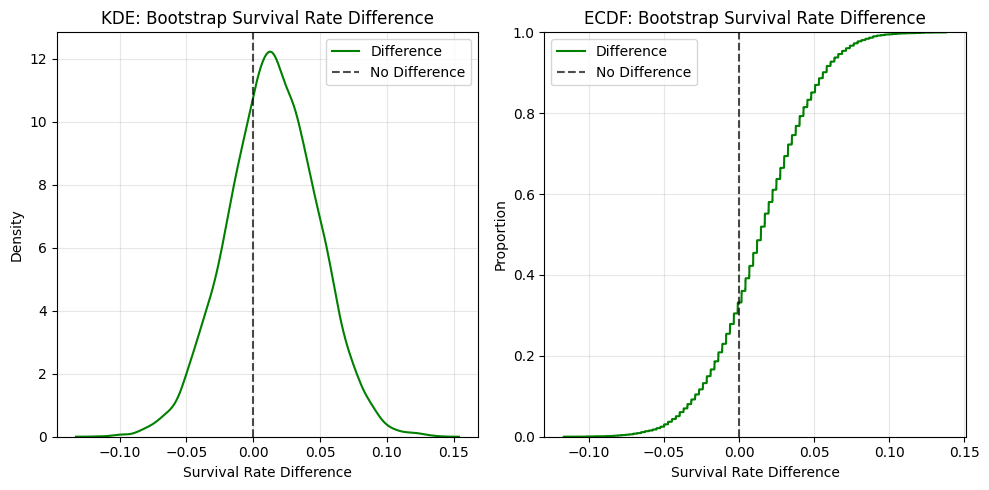

In [26]:
diff_bootstrap = inv_bootstrap - con_bootstrap

fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))

sns.kdeplot(diff_bootstrap, color='green', label='Difference', ax=axes2[0])
axes2[0].axvline(x=0, color='black', linestyle='--', alpha = 0.7, label='No Difference')
axes2[0].set_xlabel('Survival Rate Difference')
axes2[0].set_title('KDE: Bootstrap Survival Rate Difference')
axes2[0].legend()
axes2[0].grid(True, alpha = 0.3)

sns.ecdfplot(diff_bootstrap, color='green', label='Difference', ax=axes2[1])
axes2[1].axvline(x=0, color='black', linestyle='--', alpha = 0.7, label='No Difference')
axes2[1].set_xlabel('Survival Rate Difference')
axes2[1].set_title('ECDF: Bootstrap Survival Rate Difference')
axes2[1].legend()
axes2[1].grid(True, alpha = 0.3)

plt.tight_layout()
plt.show()

### 7.
**Is this an effective health intervention? Explain your answer clearly**


This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)